In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/customer segmentation data.csv", encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Data Cleaning:

In [ ]:
df = df.dropna(subset=['Description'])
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [ ]:
df.shape

(540455, 8)

In [ ]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 540455, dtype: object

### Removing punctuation (.!<>{}’,”(/)-) and Numbers:

In [ ]:
df['Descsription_processed'] = df['Description'].str.replace("[^a-zA-Z]", " ")   # ^ means not symbol
df['Descsription_processed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF    SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: Descsription_processed, Length: 540455, dtype: object

### Removing short words:

In [ ]:
df['Descsription_processed'] = df['Descsription_processed'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Descsription_processed'] = df['Descsription_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['Descsription_processed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Descsription_processed, Length: 540455, dtype: object

### LowerCase character:

In [ ]:
df['Descsription_processed'] = [review.lower() for review in df['Descsription_processed']]
df['Descsription_processed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Descsription_processed, Length: 540455, dtype: object

### Remove stop words:

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = []

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['Descsription_processed'] = [remove_stopwords(r) for r in df['Descsription_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Word tokenise + POS Tagging + Lemmatization

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# function for Converting the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    #tuple of (token, wordnet_tag)     # convert detailed POS into shallow POS
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            # if tag == wordnet.NOUN:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            
    return " ".join(lemmatized_sentence)


df['Descsription_processed'] = df['Descsription_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df['Descsription_processed']

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905              child apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: Descsription_processed, Length: 540455, dtype: object

### Dropping the duplicates:

In [ ]:
df2 = df['Descsription_processed'].drop_duplicates()
df2 = pd.DataFrame(df2)
df2

,Descsription_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet box
535329,mixed
537621,cream hang heart light holder


### plotting most frequent words:

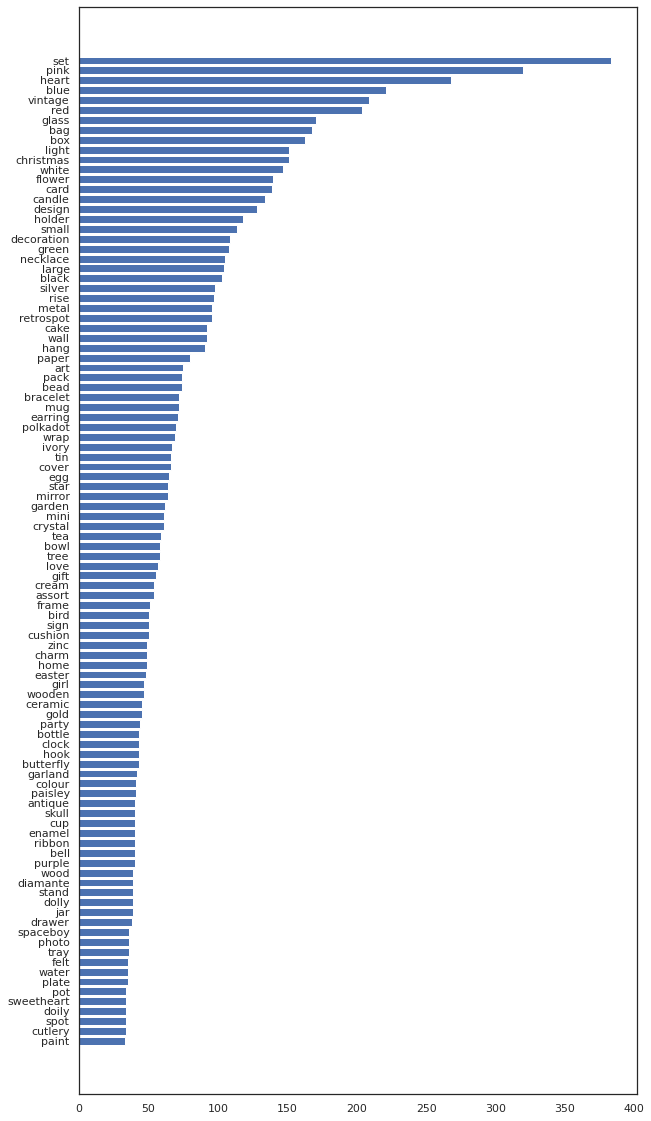

In [ ]:
## Plotting most frequent words from positive reviews using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data


#Extracts words into list and count frequency
all_words = ' '.join([text for text in df2['Descsription_processed']])  # all the rows are joined into a single paragraph
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 100 words by frequency
words_df = words_df.nlargest(columns="count", n = 100) 

words_df.sort_values('count', inplace = True)


# Plotting 100 frequent words
plt.figure(figsize=(10,20))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

### Word cloud:

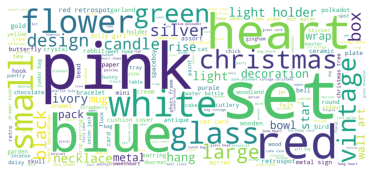

In [ ]:
## Building a Word Cloud

from wordcloud import WordCloud

all_words = ' '.join([text for text in df2['Descsription_processed']])
 
wordcloud = WordCloud(width = 1800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (5, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## VECTORIZATION

### frequency approach:

In [ ]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False) 

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2['Descsription_processed']) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df3 = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df3

,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## k-means:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
# sns.set_context('notebook')
plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

### Elbow plot(freq approach)

In [ ]:
# # performing standardization
# sc = StandardScaler()
# X_scaled = sc.fit_transform(x)

In [ ]:
# Elbow plot
# We make a plot between k value and inertia
from sklearn.cluster import KMeans

list_k = list(range(1, 20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

# Plot see against k
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

### modelling

In [ ]:
# # performing standardization
# sc = StandardScaler()
# X_scaled = sc.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)  # components - hyperpara
# perform PCA on the scaled data
pca.fit(x)

PCA()

In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[2.41092983e+00 1.91461082e+00 1.78865551e+00 ... 1.69999125e-33
 8.38352595e-34 4.45108282e-34]



In [ ]:
print("Cumulative Variances (Percentage):")
print((pca.explained_variance_ratio_.cumsum() * 100))

Cumulative Variances (Percentage):
[  2.41092983   4.32554065   6.11419616 ... 100.         100.
 100.        ]


Text(0, 0.5, 'Explained variance (%)')

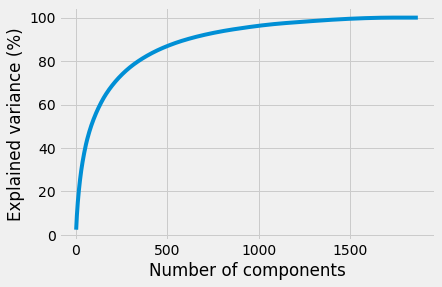

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Number of components: 342


Text(0, 0.5, 'Explained variance (%)')

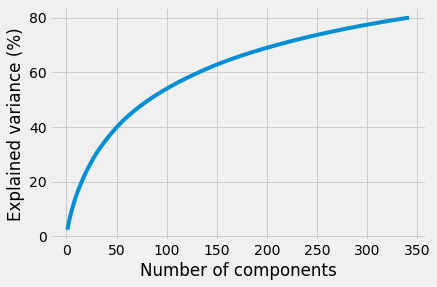

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.80)
pca.fit(x)

# print("Cumulative Variances (Percentage):")
# print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

freq approach:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(342)
Principal_Component_Analysis = pca.fit_transform(x)
Principal_Component_Analysis.shape 

(4020, 342)

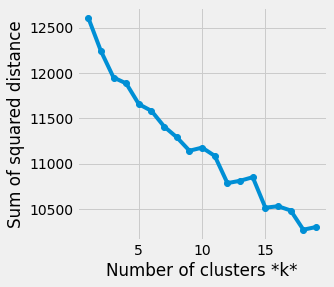

In [ ]:
# Elbow plot
# We make a plot between k value and inertia

list_k = list(range(1, 20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(Principal_Component_Analysis)
    inertias.append(km.inertia_)

# Plot see against k
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

In [ ]:
# modelling
km = KMeans(n_clusters=11) # applying k = 4
km.fit(Principal_Component_Analysis) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points

# print("centroids: ",centroids)
# print("inertia: ",km.inertia_) # measures how tight my groups are. lower the better

In [ ]:
km.labels_   # shows which group each datapoint belongs to

array([9, 6, 9, ..., 6, 9, 6], dtype=int32)

In [ ]:
#predict the labels of clusters.
label = km.fit_predict(Principal_Component_Analysis)  
print(label)

[4 8 1 ... 8 4 8]


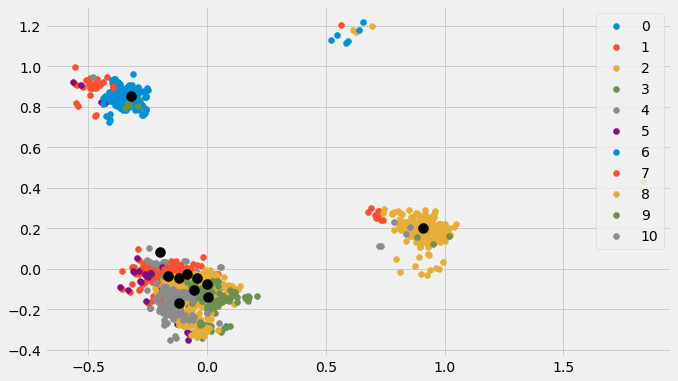

In [ ]:
#Getting the Centroids
centroids = km.cluster_centers_
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in labels:
    plt.scatter(Principal_Component_Analysis[label == i , 0] , Principal_Component_Analysis[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, c = 'k')
plt.legend()
plt.show()

3d plot:

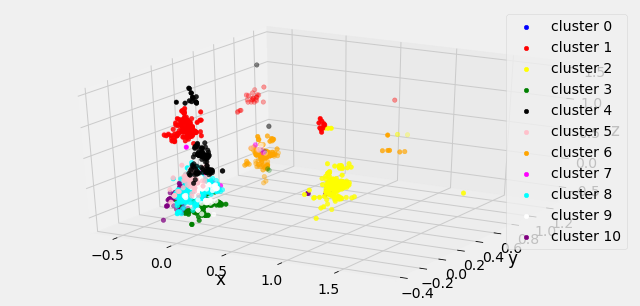

In [ ]:
#Getting the Centroids
# centroids = km.cluster_centers_
labels = np.unique(label)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Principal_Component_Analysis[label == 0,0],Principal_Component_Analysis[label == 0,1],Principal_Component_Analysis[label == 0,2], s = 20 , color = 'blue', label = "cluster 0")  
ax.scatter(Principal_Component_Analysis[label == 1,0],Principal_Component_Analysis[label == 1,1],Principal_Component_Analysis[label == 1,2], s = 20 , color = 'red', label = "cluster 1")  
ax.scatter(Principal_Component_Analysis[label == 2,0],Principal_Component_Analysis[label == 2,1],Principal_Component_Analysis[label == 2,2], s = 20 , color = 'yellow', label = "cluster 2")  
ax.scatter(Principal_Component_Analysis[label == 3,0],Principal_Component_Analysis[label == 3,1],Principal_Component_Analysis[label == 3,2], s = 20 , color = 'green', label = "cluster 3") 
ax.scatter(Principal_Component_Analysis[label == 4,0],Principal_Component_Analysis[label == 4,1],Principal_Component_Analysis[label == 4,2], s = 20 , color = 'black', label = "cluster 4") 
ax.scatter(Principal_Component_Analysis[label == 5,0],Principal_Component_Analysis[label == 5,1],Principal_Component_Analysis[label == 5,2], s = 20 , color = 'pink', label = "cluster 5") 
ax.scatter(Principal_Component_Analysis[label == 6,0],Principal_Component_Analysis[label == 6,1],Principal_Component_Analysis[label == 6,2], s = 20 , color = 'orange', label = "cluster 6") 
ax.scatter(Principal_Component_Analysis[label == 7,0],Principal_Component_Analysis[label == 7,1],Principal_Component_Analysis[label == 7,2], s = 20 , color = 'magenta', label = "cluster 7") 
ax.scatter(Principal_Component_Analysis[label == 8,0],Principal_Component_Analysis[label == 8,1],Principal_Component_Analysis[label == 8,2], s = 20 , color = 'cyan', label = "cluster 8") 
ax.scatter(Principal_Component_Analysis[label == 9,0],Principal_Component_Analysis[label == 9,1],Principal_Component_Analysis[label == 9,2], s = 20 , color = 'white', label = "cluster 9") 
ax.scatter(Principal_Component_Analysis[label == 10,0],Principal_Component_Analysis[label == 10,1],Principal_Component_Analysis[label == 10,2], s = 20 , color = 'purple', label = "cluster 10") 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

### joining:

In [ ]:
df5 = pd.DataFrame(km.labels_)
print(df5.shape)
df5

(4020, 1)


,0
0,4
1,8
2,1
3,8
4,1
...,...
4015,8
4016,3
4017,8
4018,4


In [ ]:
print(df2.shape)
df2

(4020, 1)


,Descsription_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet box
535329,mixed
537621,cream hang heart light holder


In [ ]:
df2 = df2.reset_index(drop=True)
df2

,Descsription_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
4015,wet
4016,wet box
4017,mixed
4018,cream hang heart light holder


In [ ]:
df6 = df2.join(df5)
print(df6.shape)
df6

(4020, 2)


,Descsription_processed,0
0,white hang heart light holder,4
1,white metal lantern,8
2,cream cupid heart coat hanger,1
3,knit union flag hot water bottle,8
4,red woolly hottie white heart,1
...,...,...
4015,wet,8
4016,wet box,3
4017,mixed,8
4018,cream hang heart light holder,4


In [ ]:
df6.rename(columns={0:'Product Cluster'},inplace=True)
df6.head(3)

,Descsription_processed,Product Cluster
0,white hang heart light holder,4
1,white metal lantern,8
2,cream cupid heart coat hanger,1


In [ ]:
df8 = pd.merge(df, df6, how='left', on='Descsription_processed')
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Descsription_processed,Product Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,4
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,1
...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,8
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl,8
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,8
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,8


In [ ]:
df18 = pd.get_dummies(df8,columns=["Product Cluster"])
df18

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Descsription_processed,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Product Cluster_4,Product Cluster_5,Product Cluster_6,Product Cluster_7,Product Cluster_8,Product Cluster_9,Product Cluster_10
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,0,0,0,0,1,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,0,0,0,0,0,0,0,0,1,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,0,1,0,0,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,0,0,0,0,0,0,0,0,1,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,0,0,0,0,0,0,0,0,1,0,0
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl,0,0,0,0,0,0,0,0,1,0,0
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,0,0,0,0,0,0,0,0,1,0,0
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df19 = df18.copy()

In [ ]:
df19 = df19.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Descsription_processed"],axis=1)
df19.head()

,Quantity,UnitPrice,CustomerID,Country,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Product Cluster_4,Product Cluster_5,Product Cluster_6,Product Cluster_7,Product Cluster_8,Product Cluster_9,Product Cluster_10
0,6,2.55,17850.0,United Kingdom,0,0,0,0,1,0,0,0,0,0,0
1,6,3.39,17850.0,United Kingdom,0,0,0,0,0,0,0,0,1,0,0
2,8,2.75,17850.0,United Kingdom,0,1,0,0,0,0,0,0,0,0,0
3,6,3.39,17850.0,United Kingdom,0,0,0,0,0,0,0,0,1,0,0
4,6,3.39,17850.0,United Kingdom,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df20 = pd.get_dummies(df19,columns=["Country"])
df20.head()

,Quantity,UnitPrice,CustomerID,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Product Cluster_4,Product Cluster_5,Product Cluster_6,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,17850.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,17850.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,17850.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
 
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
 
# Encode labels.
df20['CustomerID']= label_encoder.fit_transform(df20['CustomerID'])
 
df20.head()

,Quantity,UnitPrice,CustomerID,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Product Cluster_4,Product Cluster_5,Product Cluster_6,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,4048,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,4048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,4048,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,4048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,4048,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df20.shape

(540455, 52)

In [ ]:
df21 = df20.groupby(['CustomerID']).mean()
df21

,Quantity,UnitPrice,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Product Cluster_4,Product Cluster_5,Product Cluster_6,Product Cluster_7,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
1,13.505495,2.644011,0.000000,0.032967,0.131868,0.082418,0.071429,0.027473,0.076923,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,75.516129,5.764839,0.000000,0.096774,0.064516,0.000000,0.000000,0.000000,0.064516,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,8.643836,8.289041,0.000000,0.109589,0.205479,0.123288,0.027397,0.041096,0.013699,0.013699,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,11.588235,3.841176,0.117647,0.000000,0.000000,0.117647,0.000000,0.000000,0.058824,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,7.714286,5.622857,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
4369,7.538462,4.821538,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.076923,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
4370,1.847884,1.614987,0.000000,0.011905,0.058201,0.107143,0.013228,0.022487,0.060847,0.001323,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000


In [ ]:
df21.describe()

,Quantity,UnitPrice,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Product Cluster_4,Product Cluster_5,Product Cluster_6,Product Cluster_7,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,...,4373.000000,4373.000000,4373.000000,4373.00000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000
mean,22.384653,7.978650,0.003141,0.063563,0.107533,0.073259,0.052603,0.025429,0.042776,0.015758,...,0.000229,0.000229,0.000229,0.00678,0.001829,0.004669,0.000915,0.000457,0.903496,0.000915
std,213.233296,144.946736,0.014266,0.084961,0.102848,0.083010,0.098907,0.055751,0.059577,0.036608,...,0.015122,0.015122,0.015122,0.08158,0.042737,0.067689,0.030234,0.021383,0.295310,0.030234
min,-144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.461538,2.221642,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.494048,2.944593,0.000000,0.039409,0.093750,0.062500,0.023810,0.008333,0.028490,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14.000000,3.898836,0.000000,0.090343,0.153846,0.103448,0.062802,0.034483,0.062500,0.018900,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12540.000000,8055.780000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y = df21.to_numpy()
y

array([[0.00000000e+00, 1.04000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.35054945e+01, 2.64401099e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.55161290e+01, 5.76483871e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.84788360e+00, 1.61498677e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.26571429e+01, 1.49357143e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.11913101e+00, 8.16445909e+00, 4.94664212e-03, ...,
        0.00000000e+00, 9.88924311e-01, 1.51168186e-03]])

In [ ]:
# performing scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)

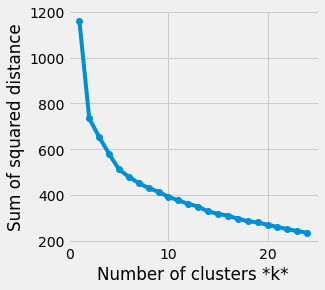

In [ ]:
list_k = list(range(1, 25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(y_scaled)
    inertias.append(km.inertia_)

# Plot see against k
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

In [ ]:
y_scaled.shape

(4373, 51)

In [ ]:
# modelling
km = KMeans(n_clusters=5) # applying k = 4
km.fit(y_scaled) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points

# print("centroids: ",centroids)
# print("inertia: ",km.inertia_) # measures how tight my groups are. lower the better

In [ ]:
km.labels_   # shows which group each datapoint belongs to

array([1, 0, 0, ..., 1, 2, 1], dtype=int32)

In [ ]:
#predict the labels of clusters.
label = km.fit_predict(y_scaled)  
print(label)

[0 4 4 ... 0 1 0]


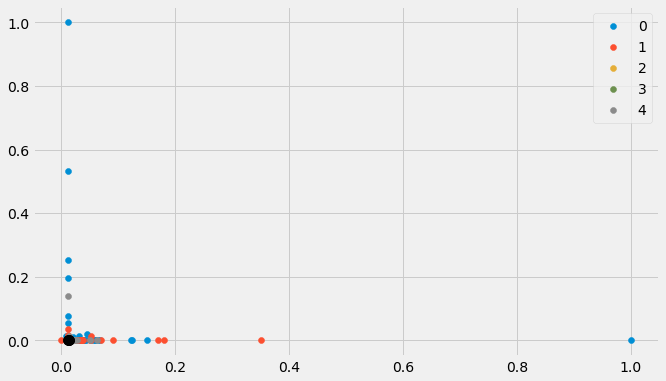

In [ ]:
#Getting the Centroids
centroids = km.cluster_centers_
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in labels:
    plt.scatter(y_scaled[label == i , 0] , y_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, c = 'k')
plt.legend()
plt.show()

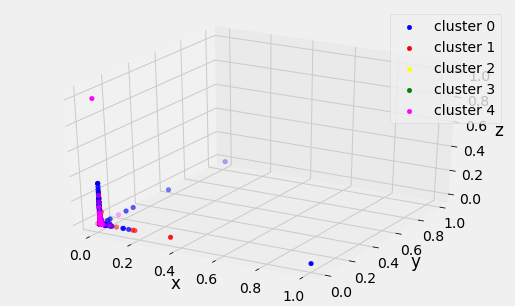

In [ ]:
#Getting the Centroids
# centroids = km.cluster_centers_
labels = np.unique(label)

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_scaled[label == 0,0],y_scaled[label == 0,1],y_scaled[label == 0,2], s = 20 , color = 'blue', label = "cluster 0")  
ax.scatter(y_scaled[label == 1,0],y_scaled[label == 1,1],y_scaled[label == 1,2], s = 20 , color = 'red', label = "cluster 1")  
ax.scatter(y_scaled[label == 2,0],y_scaled[label == 2,1],y_scaled[label == 2,2], s = 20 , color = 'yellow', label = "cluster 2")  
ax.scatter(y_scaled[label == 3,0],y_scaled[label == 3,1],y_scaled[label == 3,2], s = 20 , color = 'green', label = "cluster 3")  
ax.scatter(y_scaled[label == 4,0],y_scaled[label == 4,1],y_scaled[label == 4,2], s = 20 , color = 'magenta', label = "cluster 4")  

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()